Figure 5 in Mahdavi & Siegel (2021) Indoor Air

This figure illustrates PM2.5 mass fractions in HVAC filter dust in terms of the measured PM2.5 HVAC filter efficiencies in ASHRAE RP-1649 filtration project.

Plot type: Combined scatter and line plots

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.container as container
import matplotlib.ticker as mtick
import numpy as np
exec(open(r'C:\PhD Research\Generic Codes\notion_corrections.py').read())

In [3]:
### Reading from the main dataframe (pm_master) and defining the x and y axes values

df = pd.read_excel(backslash_correct(r'C:\PhD Research\PhD - PSD TSP\Processed\pm_master.xlsx'))
df.columns

df = df[['ft', 'PM2.5 Fr', 'eff_2.5']]

for f in df['ft'].unique():
    temp_desc = df.loc[df['ft'] == f, 'eff_2.5'].describe()
    df = df[(df['ft'] != f) | 
            ((df['ft'] == f) & 
             (df['eff_2.5'] <= temp_desc['75%']) & (df['eff_2.5'] >= temp_desc['25%']))] # The first condtion keeps all other filter types, the second condition applies threshold on the current filters

for i in range(1,6):
    df['cf2.5_%s' %i] = (0.1*i)*df['eff_2.5']
    
df_coml = pd.DataFrame([[np.nan, np.nan, 0, 0, 0, 0, 0, 0],[np.nan, np.nan, 60, 6, 12, 18, 24, 30]], columns = df.columns)
df = df.append(df_coml)
df.reset_index(inplace = True)

color_code = {1:'b',
              2:'r',
              3:'g',
              4:'k'}

marker_code = {1:'o',
               2:'s',
               3:'^',
               4:'D'}

label_code = {1:'8',
              2:'8E',
              3:'11',
              4:'14'}

line_color_code = {1:'darkgray',
                   2:'darkgrey',
                   3: 'gray',
                   4:'dimgrey',
                   5: 'k'}

df.sort_values('ft', inplace = True)

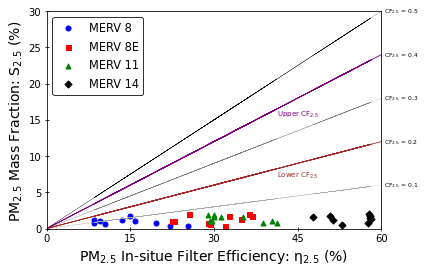

In [4]:
plt.figure()
for f in df['ft'].dropna().unique():
    plt.scatter(df[df['ft'] == f]['eff_2.5'],
                df[df['ft'] == f]['PM2.5 Fr'],
                c = color_code[f], label = 'MERV ' + label_code[f], marker = marker_code[f], s = 25)

for i in range(1,6):
    plt.plot(df['eff_2.5'],
             df['cf2.5_%s' %i], 
             c = line_color_code[i], lw = 0.2)
    plt.text(60.5, df.loc[len(df)-1, 'cf2.5_%s' %i], 'CF$_{2.5}$ = ' + str(round(i*0.1,1)), fontsize = 6, ha = 'left', va = 'center')

plt.plot(df['eff_2.5'], df['cf2.5_2'], c = 'brown', lw = 0.8)
plt.plot(df['eff_2.5'], df['cf2.5_4'], c = 'purple', lw = 0.8)

plt.text(45, 7.4, 'Lower CF$_{2.5}$', fontsize = 7, c = 'brown', ha = 'center', va = 'center')
plt.text(45, 15.7, 'Upper CF$_{2.5}$', fontsize = 7, c = 'purple', ha = 'center', va = 'center')
    
plt.xlim(0, 60)
# a = [0.000003, 0.00001, 0.00003, 0.0001]
plt.xticks(np.arange(0, 61, step = 15))
plt.xlabel(r'PM$_{2.5}$ In-situe Filter Efficiency: η$_{2.5}$ (%)', size = 14) # FIX THIS

plt.ylim(0, 30)
plt.yticks(np.arange(0, 31, step=5))
plt.ylabel('PM$_{2.5}$ Mass Fraction: S$_{2.5}$ (%) ', size = 14)

plt.tick_params(axis = 'both', direction = 'inout')
# plt.ticklabel_format(style='sci', axis='both')

## The below system doesn't work in loop as it cumulatvely add labels. Should later find a solution for it.

plt.legend(loc = 2, frameon = True, edgecolor = 'black', fontsize = 11.4)
    
plt.savefig(r'C:/PhD Research/PhD - PSD TSP/Processed/plots/Figure_5.jpg', format='jpg', dpi=1600, bbox_inches='tight')

End of Code